![actividad-1.png](sistema_proc_digital.png)


## *Filtro Antialias Pasivo de 1er orden*

![1er_Orden.PNG](1er_Orden.PNG)


$$ \large H\left(s\right) =  \frac{1}{RCs+1} $$

### *Filtro Antialias Pasivo de 2do Orden*

![sallen_key.PNG](sallen_key.PNG)

$$ \large \frac{V_{0}}{V_{i}}=\frac{1}{s^{2}\cdot R_{1}C_{2}R_{2}C_{1}+s \cdot \left(R_{1}C_{2}+R_{2}C_{1}+R_{1}C_{1}\right)+1} $$


Función de transferencia del Filtro Butterworth de 1er Orden:

  1.0  
───────
s + 1.0


Función de transferencia del Filtro Butterworth de 2do Orden:

         0.707          
────────────────────────
       2                
0.707⋅s  + 1.0⋅s + 0.707




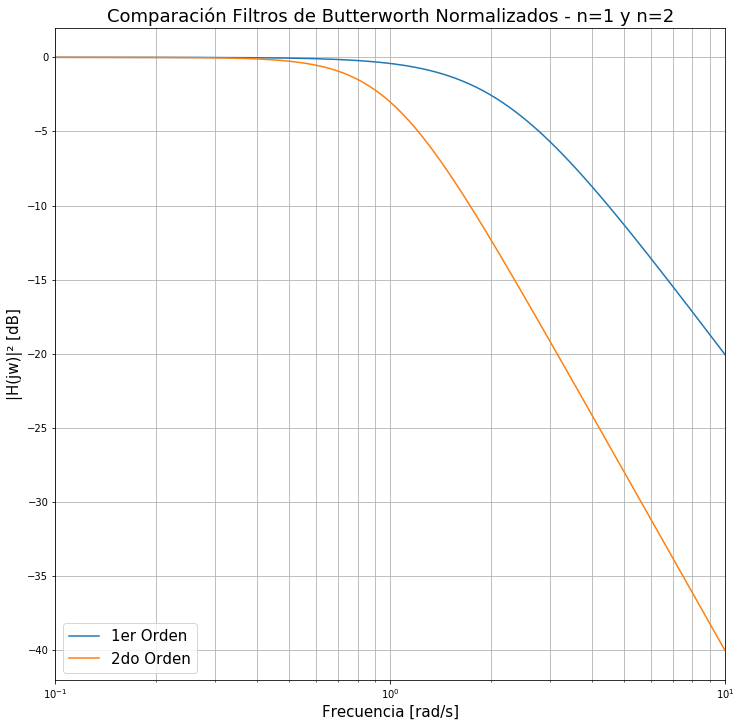

In [17]:
# %% Librerías

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

# %% 1er Orden Butterworth

n = 1

[z_1, p_1, k_1] = signal.buttap(n) 

[num1, den1] = signal.zpk2tf(z_1, p_1, k_1)

f, h1 = signal.freqs(num1, den1)

mag_h1 = 20*np.log10((abs(h1)))

#print(den1)

# %% 2do Orden Butterworth

n = 2

[z_2, p_2, k_2] = signal.buttap(n) 

[num2, den2] = signal.zpk2tf(z_2, p_2, k_2)

f, h2 = signal.freqs(num2, den2)

mag_h2 = 20*np.log10((abs(h2)))


# %% Graficas Hs.
fig, ax1 = plt.subplots(1, 1, figsize=(12, 12))
ax1.set_title('Comparación Filtros de Butterworth Normalizados - n=1 y n=2', fontsize=18)
ax1.plot(f, mag_h1 , label='1er Orden')
ax1.plot(f, mag_h2 , label='2do Orden')
ax1.legend(loc="lower left", fontsize=15)
ax1.set_xlabel('Frecuencia [rad/s]', fontsize=15)
ax1.set_ylabel('|H(jw)|² [dB]', fontsize=15)
ax1.set_xscale('log')
ax1.set_xlim(0.1, 10)
ax1.grid(True, which="both")

# %% Desarrollo de Hs de ambas funciones de transferencia

s = sy.Symbol('s') # Se crea una variable simbólica s

# % 1er Orden
num1_s = num1

den1_s = sy.expand(den1[0]* s) + sy.expand(den1[1])

Hs1 = num1_s * sy.expand(den1_s.as_numer_denom()[1]) / sy.expand(den1_s.as_numer_denom()[0])

Hs1 = sy.factor(Hs1)[0]

print("Función de transferencia del Filtro Butterworth de 1er Orden:\r\n")
  
print(sy.pretty(Hs1.evalf(3))) 

print("\r\n")


# % 2do Orden
num2_s = num2

den2_s = sy.expand(den2[0]*np.power(s,2)) + sy.expand(den2[1] * s) + sy.expand(den2[2])

Hs2 = num2_s * sy.expand(den2_s.as_numer_denom()[1]) / sy.expand(den2_s.as_numer_denom()[0])

Hs2 = sy.factor(Hs2)[0]

print("Función de transferencia del Filtro Butterworth de 2do Orden:\r\n") 
print(sy.pretty(Hs2.evalf(3))) 
print("\r\n")

Función de transferencia del Filtro Butterworth de 1er Orden:

      1.0      
───────────────
0.00796⋅s + 1.0


Función de transferencia del Filtro Butterworth de 2do Orden:

            1.0            
───────────────────────────
         2                 
6.33e-5⋅s  + 0.0113⋅s + 1.0




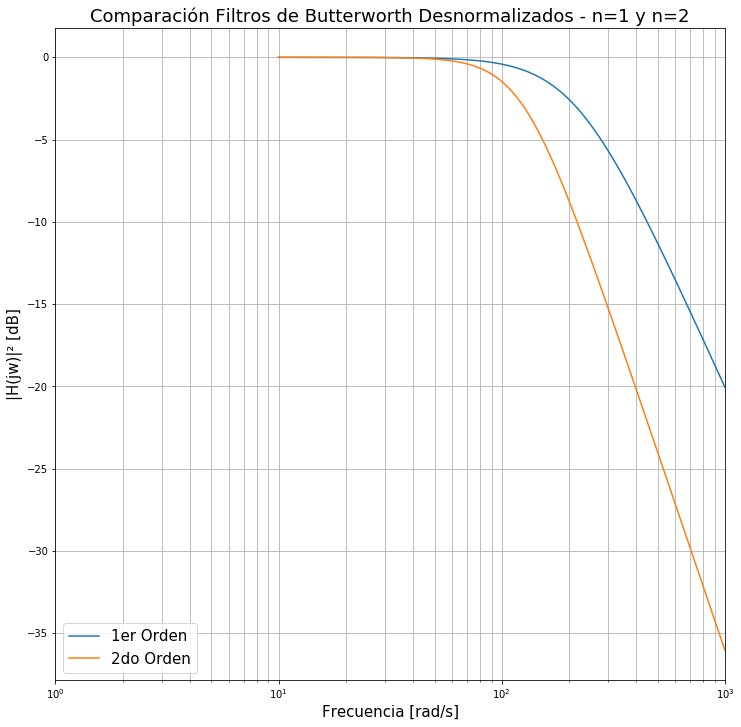

In [18]:
# %% Desnormalizacion

wc = 2 * np.pi * 20  # freceuncia de corte 20 Hz

s = sy.Symbol('s') # Se crea una variable simbólica s

sdn = s/wc
# % 1er Orden
num1_sdn = num1

den1_sdn = sy.expand(den1[0]* sdn ) + sy.expand(den1[1])

Hs1 = num1_sdn * sy.expand(den1_sdn.as_numer_denom()[1]) / sy.expand(den1_sdn.as_numer_denom()[0])

Hs1 = sy.factor(Hs1)[0]

print("Función de transferencia del Filtro Butterworth de 1er Orden:\r\n")
  
print(sy.pretty(Hs1.evalf(3))) 

print("\r\n")


# % 2do Orden
num2_sdn = num2

den2_sdn = sy.expand(den2[0]*np.power(sdn,2)) + sy.expand(den2[1] * sdn) + sy.expand(den2[2])

Hs2 = num2_sdn * sy.expand(den2_sdn.as_numer_denom()[1]) / sy.expand(den2_sdn.as_numer_denom()[0])

Hs2 = sy.factor(Hs2)[0]

print("Función de transferencia del Filtro Butterworth de 2do Orden:\r\n") 
print(sy.pretty(Hs2.evalf(3))) 
print("\r\n")


num1_dn = np.array(sy.poly(Hs1.as_numer_denom()[0], s).all_coeffs()).astype(float)
den1_dn = np.array(sy.poly(Hs1.as_numer_denom()[1], s).all_coeffs()).astype(float)

num2_dn = np.array(sy.poly(Hs2.as_numer_denom()[0], s).all_coeffs()).astype(float)
den2_dn = np.array(sy.poly(Hs2.as_numer_denom()[1], s).all_coeffs()).astype(float)

f, h1_dn = signal.freqs(num1_dn, den1_dn)

mag_h1_dn = 20*np.log10((abs(h1_dn)))

f, h2_dn = signal.freqs(num2_dn, den2_dn)

mag_h2_dn = 20*np.log10((abs(h2_dn)))



# %% Graficas Hs.
fig2, ax1 = plt.subplots(1, 1, figsize=(12, 12))
ax1.set_title('Comparación Filtros de Butterworth Desnormalizados - n=1 y n=2', fontsize=18)
ax1.plot(f, mag_h1 , label='1er Orden')
ax1.plot(f, mag_h2_dn , label='2do Orden')
ax1.legend(loc="lower left", fontsize=15)
ax1.set_xlabel('Frecuencia [rad/s]', fontsize=15)
ax1.set_ylabel('|H(jw)|² [dB]', fontsize=15)
ax1.set_xscale('log')
ax1.set_xlim(1, 1000)
ax1.grid(True, which="both")


